In [51]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

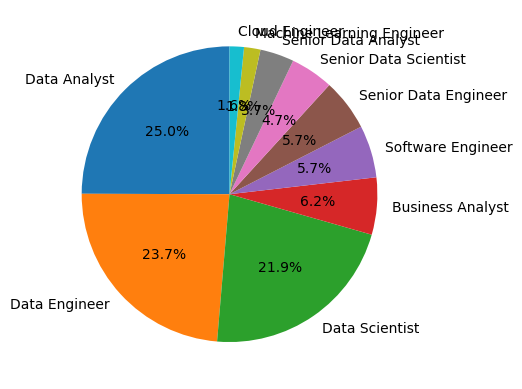

In [52]:
df['job_title_short'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.ylabel("")
plt.show()

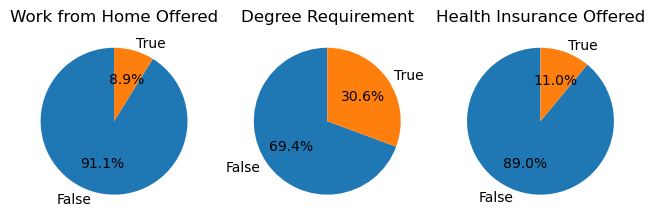

In [53]:
#showing the percentage of different fields in the data frame
columns = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']
titles = ['Work from Home Offered', 'Degree Requirement', 'Health Insurance Offered']

fig, ax = plt.subplots(1, 3)

for i in range(3):
    ax[i].pie(df[columns[i]].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()
  

In [ ]:
#scatter plots
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats


,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


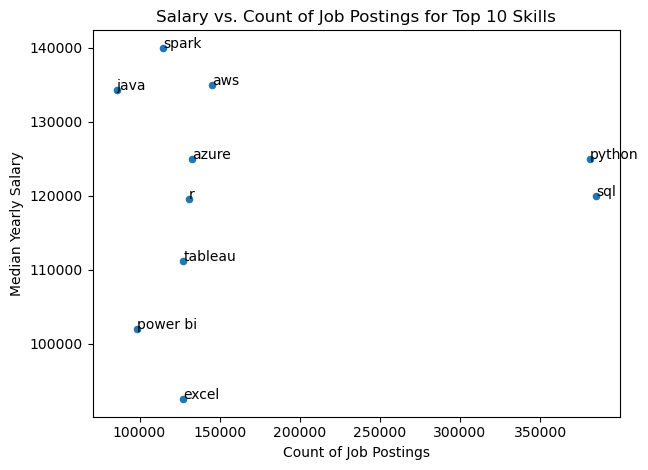

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout() 

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()